# Entrenando Algoritmos de Machine Learning para Clasificación

# Implementando un algoritmo de aprendizaje tipo Perceptrón en Python: Una API de Perceptrón orientada a Objetos

In [67]:
import numpy as np


class Perceptron(object):
    """Clasificador basado en perceptron.

     Parámetros
     ------------
     eta: float
       Tasa de aprendizaje (entre 0,0 y 1,0)
     n_iter: int
       Pasos sobre el conjunto de datos de entrenamiento.
     random_state: int
       Semilla del generador de números aleatorios para
       inicialización de los pesos de forma aleatoria.

     Atributos
     -----------
     w_: matriz-1d (1d-array)
       Pesos después del fitting.
     errors_: list
       Número de clasificaciones erróneas (actualizaciones) en cada época.

     """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Ajustar pesos con los datos de entrenamiento.

         Parámetros
         ----------
         X: {tipo-array}, shape = [n_samples, n_features]
           Vectores de entrenamiento, donde n_samples es el número de muestras y
           n_features es el número de características.
         y: tipo-array, shape = [n_samples]
           Valores objetivo.

         Retorno
         -------
         self: objet

         """
        rgen = np.random.RandomState(self.random_state)
        #SOLO TIENE UNA NEURONA, SI SE QUISIESEN PONER MÁS, ¿CÓMO SE HARÍA? SUPONGO QUE CREANDO ALGÚN MÉTODO .ADD ...
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta*(target - self.predict(xi))### EJERCICIO 1: CALCULAR LA ACTUALIZACION DE PESOS <<<<<--------------------
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devolver etiqueta de clase después del paso unitario"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [68]:
import numpy as np
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
print(v1.dot(v2))
print(np.linalg.norm(v1))
print(np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))))

7.0
3.7416573867739413
0.0


## Entrenando un modelo de Perceptrón en el conjunto de datos Iris

### Leyendo el dataset Iris

In [69]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
print("HEAD", df.head())
print("TAIL", df.tail())
print("DF SHAPE", df.shape)
print("Cantidad de SETOSA ", df[df[4] == 'Iris-setosa'].shape)
print("Cantidad de VIRGINICA ", df[df[4] == 'Iris-virginica'].shape)
print("Cantidad de VERSICOLOR ", df[df[4] == 'Iris-versicolor'].shape)

HEAD      0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
TAIL        0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica
DF SHAPE (150, 5)
Cantidad de SETOSA  (50, 5)
Cantidad de VIRGINICA  (50, 5)
Cantidad de VERSICOLOR  (50, 5)


<hr>

### Nota:
Si tenéis el fichero ya descargado en un directorio local, por ejemplo en "your/local/path/to/iris.data" podéis sustituir la anterior línea de código...

    df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

por...

    df = pd.read_csv('your/local/path/to/iris.data', header=None)


<hr>

### Pintando los datos de Iris

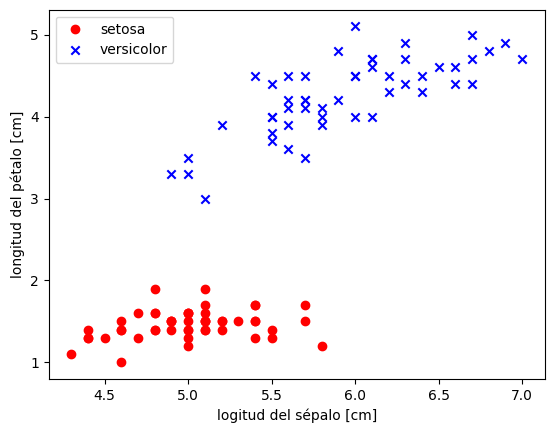

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# selecciona setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extrae longitud del sépalo y del pétalo
X = df.iloc[0:100, [0, 2]].values

# pintando los datos
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('logitud del sépalo [cm]')
plt.ylabel('longitud del pétalo [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### Entrenando el modelo Perceptrón

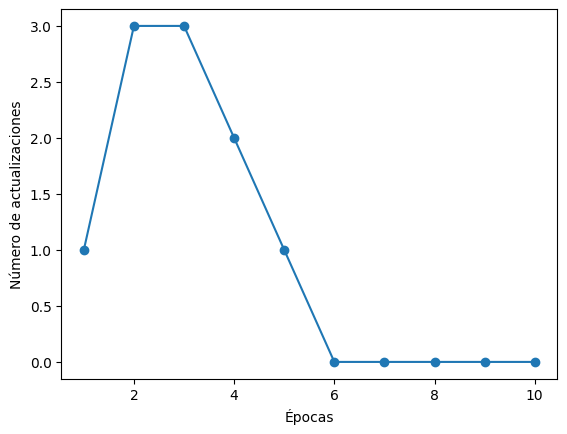

In [71]:
ppn = Perceptron(eta=0.1, n_iter=10)### EJERCICIO 2: CREA UN PERCEPTRON CON TASA DE APRENDIZAJE 0.1 Y 10 ITERACIONES <<<<<--------------------
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

Lo que se observa en la gráfica anterior es el número de actualizaciones que hay en los pesos de la red por cada época de entrenamiento. Se puede observar que a partir de la época 6 ya no se realizan más actualizaciones y esto debe de ser porque ya ha ajustado los pesos para que prediga todos los valores de entrada de manera correcta. También se puede entender como el número de predicciones que el Perceptron ha realizado mal por cada época de entrenamiento.

### Una función para pintar las regiones de decisión

In [72]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # configuramos el generador de marcadores y mapa da colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # traza/pinta la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # pinta las muestras de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

<ipython-input-72-fa4da9849d57>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


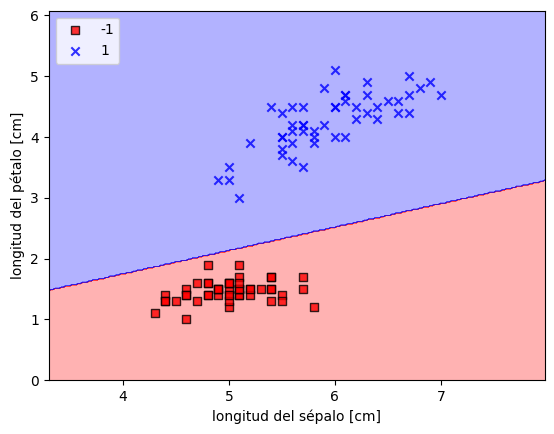

In [73]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('longitud del sépalo [cm]')
plt.ylabel('longitud del pétalo [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

En este gráfica se representa la clasificación realizada por nuestro clasificador, el perceptron, de manera geométrica. Esta clasificación, geometricamente tiene el sentido de una regresión lineal. Se verifica lo visto en clase (que un red neuronal se limita a realizar regresiones lineales, el problema es que lo hace en 'n' dimensiones, lo que dificulta su representación y entendimiento), ya que podemos ver como con una recta, nuestro clasificador ha separado las dos clases de datos en dos espacios contenidos R^2.

# Neurona lineales Adaptativas (ADALINE) y la convergencia del aprendizaje: Implementando una ADALINE en Python

In [74]:
class AdalineGD(object):
    """Clasificador ADptive LInear NEuron. ADALINE

     Parámetros
     ------------
     eta: float
       Tasa de aprendizaje (entre 0,0 y 1,0)
     n_iter: int
        Pasos sobre el conjunto de datos de entrenamiento.
     random_state: int
       Semilla del generador de números aleatorios para
       inicialización de los pesos de forma aleatoria.

     Atributos
     -----------
     w_: array-1d
       Pesos después del entrenamiento.
     cost_: list
       Valor de la función de coste (suma de cuadrados) en cada época.

     """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Ajustar pesos con los datos de entrenamiento.

         Parámetros
         ----------
         X: {tipo-array}, shape = [n_samples, n_features]
           Vectores de entrenamiento, donde n_samples es el número de muestras y
           n_features es el número de características.
         y: tipo-array, shape = [n_samples]
           Valores objetivo.

         Retorno
         -------
         self: objet

         """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Tened en cuenta que el método de "activation" no tiene ningún efecto
            # en el código ya que es simplemente una función de identidad. Nosotros
            # podría escribir `output = self.net_input(X)` directamente en su lugar.
            # El propósito del activation es más conceptual, es decir,
            # en el caso de la regresión logística, podríamos cambiarlo a
            # una función sigmoidea para implementar un clasificador de regresión logística.
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Computar la activación lineal"""
        return X

    def predict(self, X):
        """Devolver etiqueta de clase después del paso unitario"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

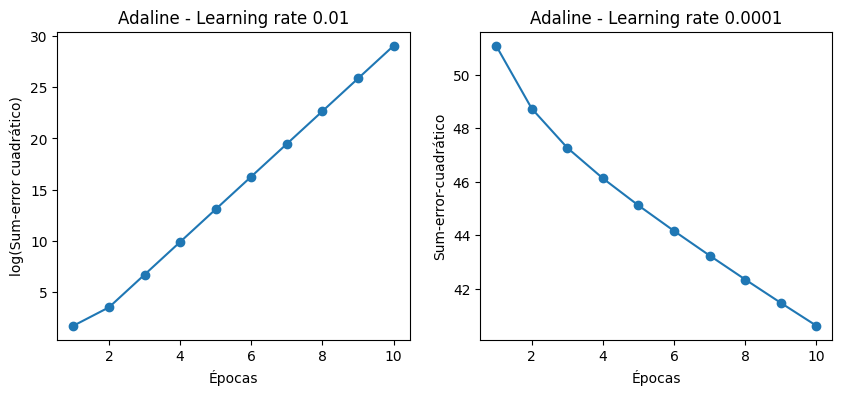

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)### EJERCICIO 6: Crea y entrena con los datos de entrenamiento y sus etiquetas un Adaline de Gradiente Descendente
       ### con 10 iteraciones y una tasa de aprendizaje de 0.01 <<<<<--------------------<<<<<--------------------<<<<<--------------------
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('log(Sum-error cuadrático)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Sum-error-cuadrático')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

Lo que se puede deducir de las gráficas anteriores es que en el primer caso,  el método de entrenamiento del modelo, el proceso de minimización de la función de pérdida diverge, es decir, en vez de acercarse al mínimo, cada vez se aleja más y más. Así, ya sabemos que con eta = 0.01, el modelo no se puede entrenar bien. No obstante, en el segundo caso se observa lo contrario, es decir, en el segundo caso con eta = 0.0001 el modelo en el entrenamiento si que se acerca a un mínimo de la función de pérdida ya que con cada época es menor.

In [77]:
import numpy as np

# Supongamos que 'predicciones' es un array de booleanos
predicciones = ada1.predict(X) == y

# Contar verdaderos
verdaderos = np.count_nonzero(predicciones)

# Contar falsos
falsos = predicciones.size - verdaderos

print(f"Verdaderos: {verdaderos}, Falsos: {falsos}")

Verdaderos: 50, Falsos: 50


<ipython-input-40-fa4da9849d57>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


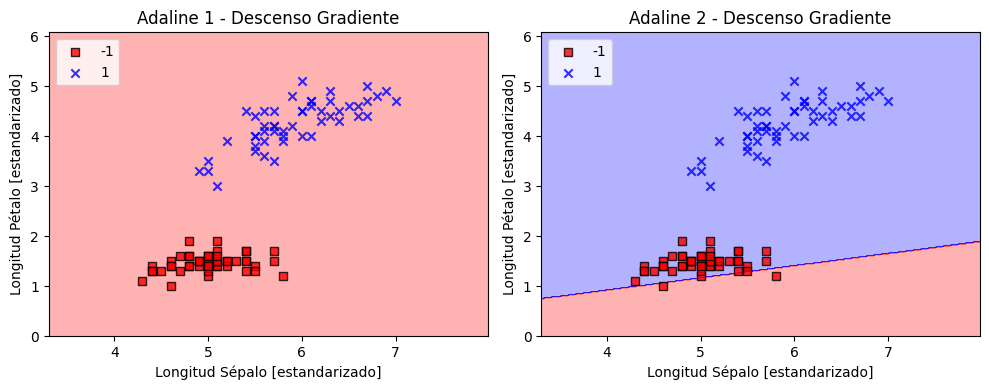

In [54]:
# PRUEBA

plt.figure(figsize=(10, 4))

# Primera gráfica
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plot_decision_regions(X, y, classifier=ada1)
plt.title('Adaline 1 - Descenso Gradiente')
plt.xlabel('Longitud Sépalo [estandarizado]')
plt.ylabel('Longitud Pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()

# Segunda gráfica
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plot_decision_regions(X, y, classifier=ada2)
plt.title('Adaline 2 - Descenso Gradiente')
plt.xlabel('Longitud Sépalo [estandarizado]')
plt.ylabel('Longitud Pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()

# Mostrar las gráficas
plt.show()

## Mejorando el Gradiente Descendente con escalado de características

In [45]:
# Estandarizar características
X_std = np.copy(X)

mean = X_std.mean(axis=0)
std = X_std.std(axis=0)

X_std[:, 0] = (X_std[:, 0] - mean[0]) / std[0]
X_std[:, 1] = (X_std[:, 1] - mean[1]) / std[1]


<ipython-input-40-fa4da9849d57>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


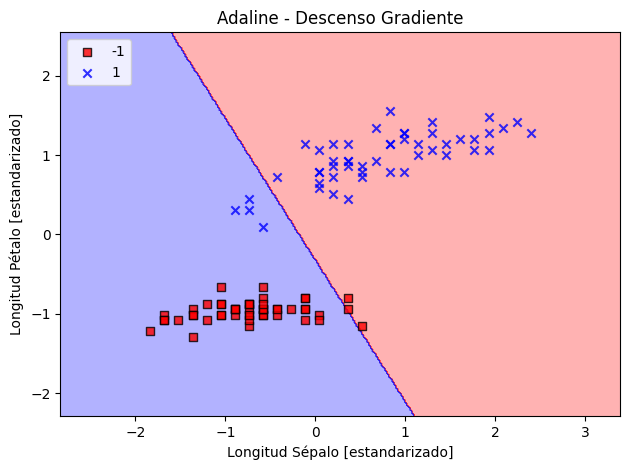

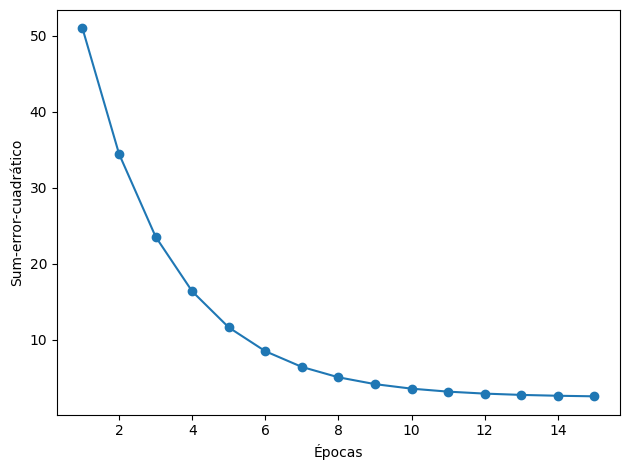

In [63]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Descenso Gradiente')
plt.xlabel('Longitud Sépalo [estandarizado]')
plt.ylabel('Longitud Pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Sum-error-cuadrático')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

Las dos gráficas anteriores demuestran como la estandarización de las características mejoran notablemente los modelos que utilizan descenso del gradiente. Nuestro modelo con eta = 0.01 ha pasado de divergir a converger. Esto se puede comprobar en la primera gráfica en la que se ve como el modelo separa de manera correcta en dos espacios nuestras dos clases. Y también en la segunda en la que se observa como el error se va minimizando con el paso de las épocas.

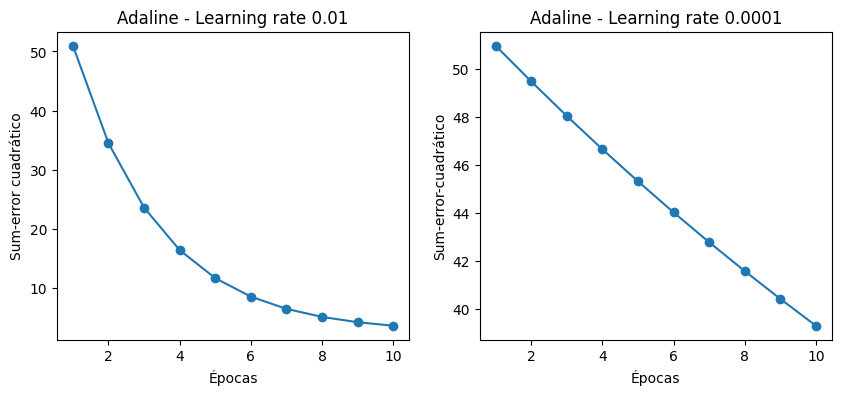

In [56]:
#PRUEBA:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada3 = AdalineGD(n_iter=10, eta=0.01).fit(X_std, y)### EJERCICIO 6: Crea y entrena con los datos de entrenamiento y sus etiquetas un Adaline de Gradiente Descendente
       ### con 10 iteraciones y una tasa de aprendizaje de 0.01 <<<<<--------------------<<<<<--------------------<<<<<--------------------
ax[0].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('Sum-error cuadrático')
ax[0].set_title('Adaline - Learning rate 0.01')

ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(X_std, y)
ax[1].plot(range(1, len(ada4.cost_) + 1), ada4.cost_, marker='o')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Sum-error-cuadrático')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

<ipython-input-40-fa4da9849d57>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


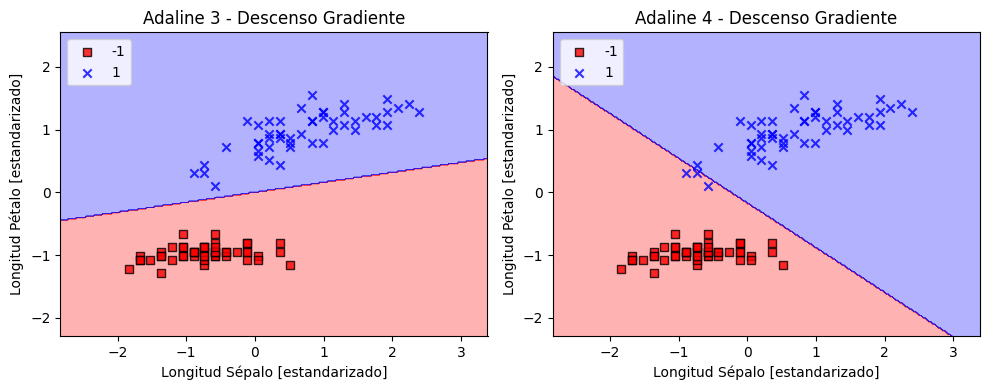

In [64]:
# PRUEBA

plt.figure(figsize=(10, 4))

# Primera gráfica
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plot_decision_regions(X_std, y, classifier=ada3)
plt.title('Adaline 3 - Descenso Gradiente')
plt.xlabel('Longitud Sépalo [estandarizado]')
plt.ylabel('Longitud Pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()

# Segunda gráfica
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plot_decision_regions(X_std, y, classifier=ada4)
plt.title('Adaline 4 - Descenso Gradiente')
plt.xlabel('Longitud Sépalo [estandarizado]')
plt.ylabel('Longitud Pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()

# Mostrar las gráficas
plt.show()

## Aprendizaje Automático a Gran Escala y Descendiente de Gradiente Estocástico

In [ ]:
class AdalineSGD(object):
    """Clasificador ADptive LInear NEuron. ADALINE

     Parámetros
     ------------
     eta: float
       Tasa de aprendizaje (entre 0,0 y 1,0)
     n_iter: int
        Pasos sobre el conjunto de datos de entrenamiento.
     shuffle : bool (default: True)
      Si es Verdadero, mezcla los datos de entrenamiento en cada época, para evitar ciclos.
     random_state: int
       Semilla del generador de números aleatorios para
       inicialización de los pesos de forma aleatoria.

     Atributos
     -----------
     w_: array-1d
       Pesos después del entrenamiento.
     cost_: list
       Valor de la función de coste (suma de cuadrados) promediado sobre todas las muestras
       de entrenamiento en cada época.

     """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Ajustar pesos con los datos de entrenamiento.

         Parámetros
         ----------
         X: {tipo-array}, shape = [n_samples, n_features]
           Vectores de entrenamiento, donde n_samples es el número de muestras y
           n_features es el número de características.
         y: tipo-array, shape = [n_samples]
           Valores objetivo.

         Retorno
         -------
         self: objet

         """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Ajustar pesos con los datos de entrenamiento sin reinicializar los pesos"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Mezclar los datos de entrenamiento"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Inicializar pesos con pequeños números aleatorios"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Aplicar la regla de aprendizaje de Adaline para actualizar los pesos"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Calcular la activación lineal"""
        return X

    def predict(self, X):
        """Devolver etiqueta de clase después del paso unitario"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

<ipython-input-81-fa4da9849d57>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


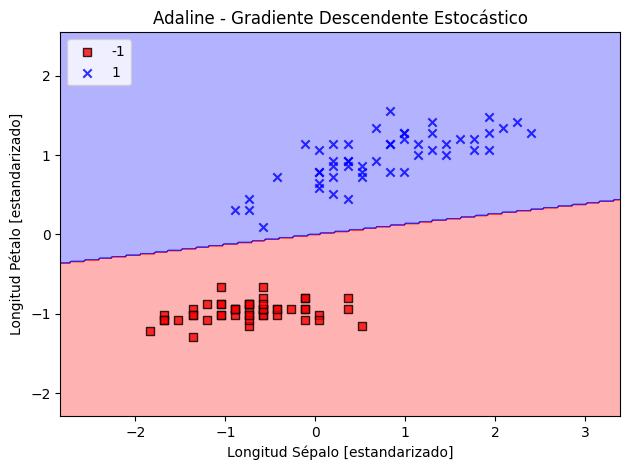

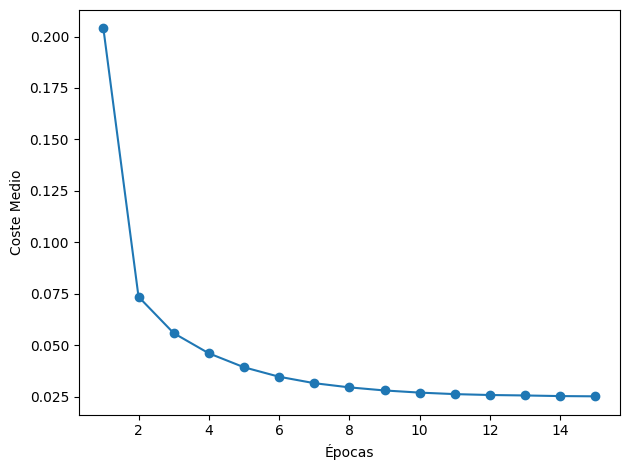

In [ ]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradiente Descendente Estocástico')
plt.xlabel('Longitud Sépalo [estandarizado]')
plt.ylabel('Longitud Pétalo [estandarizado]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Coste Medio')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

### EJERCICIO 10: EXPLICA LAS DOS GRÁFICAS ANTERIORES <<<<<--------------------

In [ ]:
ada.partial_fit(X_std[0, :], y[0])

# Resumen

In [ ]:
! python ../.convert_notebook_to_script.py --input 2_4_Perceptron_y_Adaline.ipynb --output 2_4_Perceptron_y_Adaline.py

python3: can't open file '/content/../.convert_notebook_to_script.py': [Errno 2] No such file or directory
